<a href="https://colab.research.google.com/github/ppleum21z/Linear-Regression-Health-Costs-Calculator/blob/main/Copy_of_fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-09-13 16:50:37--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2023-09-13 16:50:37 (102 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


<Axes: >

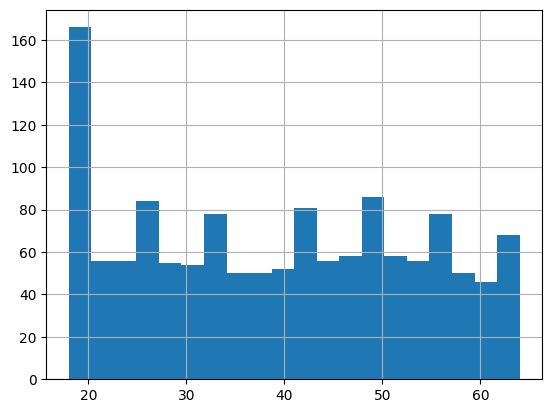

In [ ]:
dataset.age.hist(bins=20)


<Axes: >

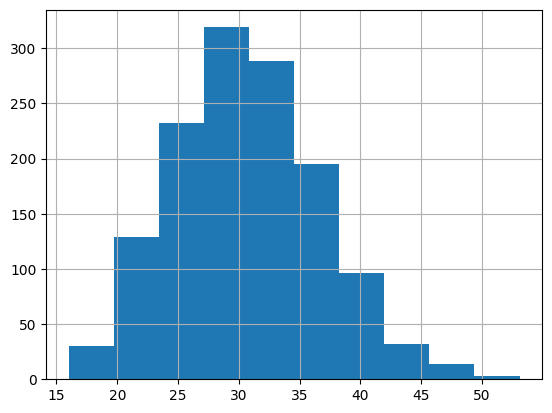

In [ ]:
dataset.bmi.hist(bins=10)

<Axes: >

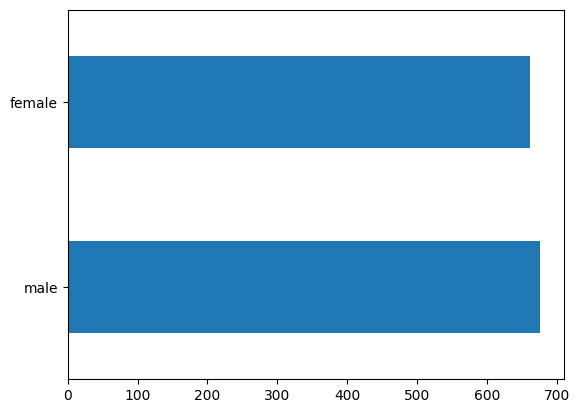

In [ ]:
dataset.sex.value_counts().plot(kind='barh')

<Axes: >

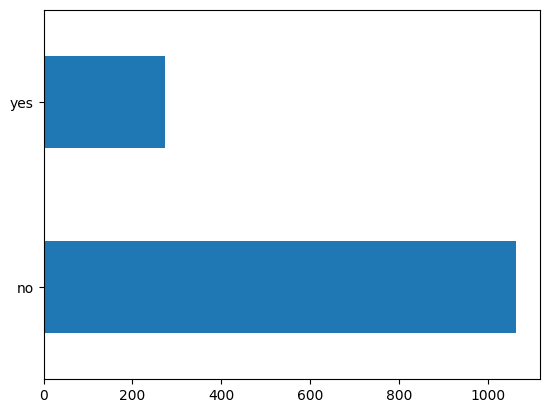

In [ ]:
dataset.smoker.value_counts().plot(kind='barh')

<Axes: >

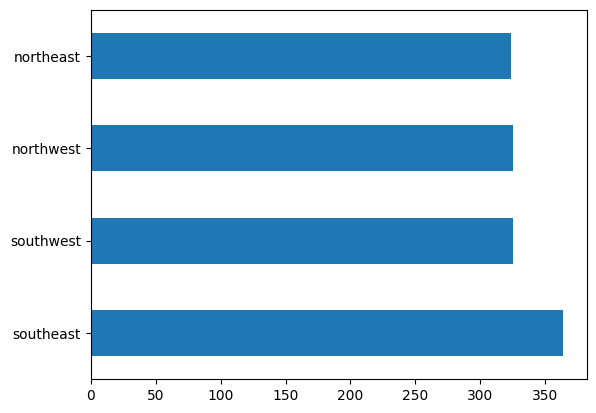

In [ ]:
dataset.region.value_counts().plot(kind='barh')

In [ ]:
dataset["sex"].replace(["female", "male"], [0, 1], inplace=True)
dataset["smoker"].replace(["no", "yes"],[0, 1],inplace=True)
dataset["region"].replace(['southwest', 'southeast', 'northwest', 'northeast'], [0, 1, 2, 3], inplace=True)

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [ ]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 782 (3.06 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100
)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 10357.8584 - mae: 10357.8584 - mse: 233090256.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 3832.9473 - mae: 3832.9473 - mse: 49399496.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 3059.0833 - mae: 3059.0833 - mse: 36134116.0000
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 2928.5364 - mae: 2928.5364 - mse: 31873040.0000
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 2724.4346 - mae: 2724.4346 - mse: 28110292.0000
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 2556.1387 - mae: 2556.1387 - mse: 25733364.0000
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 2385.6655 - mae: 2385.6655 - mse: 24218210.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 2259.0532 - mae: 2259.0532 - mse: 23532588.0000
Epoch 9/100
34/34 [==========

9/9 - 0s - loss: 2624.5576 - mae: 2624.5576 - mse: 33949072.0000 - 460ms/epoch - 51ms/step
Testing set Mean Abs Error: 2624.56 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 4ms/step


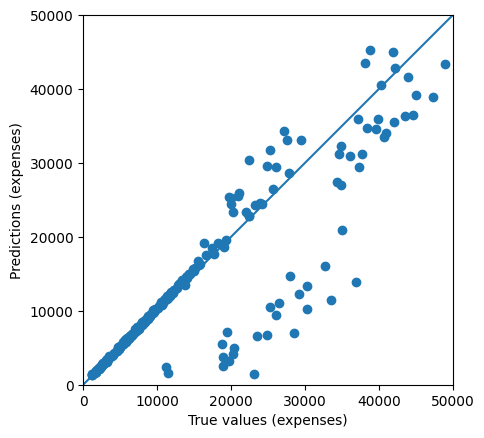

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
